In [1]:
# 載入必要的MODULE
import requests, json, datetime, jieba
import pandas as pd
from wordcloud import WordCloud

In [2]:
# 選取遊戲類別的新聞，向下捲動後發現其API連結如下
# 修改其提取數量至500筆
r = requests.get('https://www.cupoy.com/MixNewsMongoAction.do?op=getTopMixNewsByBucketGroup&groupid=Game_tw&len=500')

# 把DATA轉換成JSON格式
data = json.loads(r.text)

data

{'items': [{'itemuid': '68747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6D6963726F736F66742D78626F782D67616D65732D73686F77636173652D78626F782D7365726965732D782D3032303031323530382E68746D6C',
   'newsid': '0000017326DBE4E068747470733A2F2F6368696E6573652E656E6761646765742E636F6D2F6D6963726F736F66742D78626F782D67616D65732D73686F77636173652D78626F782D7365726965732D782D3032303031323530382E68746D6C',
   'itemsrctype': 2,
   'ctype': 5,
   'title': '微軟的下一場 Xbox Series X 直播將在 7 月 23 日放送',
   'description': '微軟宣佈了將在美東時間 7 月 23 日中午（我們的\u3000 7 月 24 日凌晨 12 點）配合 Summer Game Fest 活動播出一集 Xbox 遊戲的展示，雖然說還要再等兩個多禮拜，但好歹是有個日期了。',
   'thumbimgurl': 'https://s.yimg.com/os/creatr-uploaded-images/2020-07/15a48cf0-bfdb-11ea-bdbe-818cbd9042aa',
   'linkurl': 'https://chinese.engadget.com/microsoft-xbox-games-showcase-xbox-series-x-020012508.html',
   'nationID': 'TW',
   'publishtime': 1594084812000,
   'bucketids': ['GameInformation_tw'],
   'bucketgrpids': ['GamePlayer_tw', 'Game_tw'],
   'metrics':

In [3]:
# 提取每一筆ITEM資料的不同內容:
articles_id = []
articles_title = []
articles_description = []
articles_url = []
articles_uidactscore = []
articles_updatetime = []
count = 0

for item in data['items']:
    count +=1
    articles_id.append(count)
    articles_title.append(item.get('title'))
    articles_description.append(item.get('description'))
    articles_url.append(item.get('linkurl'))
    articles_uidactscore.append(int(item['metrics']['uidactscore']))
    articles_updatetime.append(datetime.datetime.fromtimestamp(int(item['metrics']['updatetime'])//1000)) # 把更新時間轉換成可讀格式


df = pd.DataFrame(columns=['ID','Title','Description','Link','Uidact_Score','Update_Time'])
df['ID'] = articles_id
df['Title'] = articles_title
df['Description'] = articles_description
df['Link'] = articles_url
df['Uidact_Score'] = articles_uidactscore
df['Update_Time'] = articles_updatetime

# 把更新時間轉換成可讀格式

df.head()




,ID,Title,Description,Link,Uidact_Score,Update_Time
0,1,微軟的下一場 Xbox Series X 直播將在 7 月 23 日放送,微軟宣佈了將在美東時間 7 月 23 日中午（我們的 7 月 24 日凌晨 12 點）配合...,https://chinese.engadget.com/microsoft-xbox-ga...,60,2020-07-07 13:14:40
1,2,PS2最終破解方案，FreeDVDBoot通吃所有主機 | T客邦,開發者CTurt日前釋出FreeDVDBoot破解工具，它能透過Sony PlayStati...,https://www.techbang.com/posts/79716-ps2-final...,45,2020-07-07 13:23:04
2,3,如果有 PS5 黑色機，會是什麼樣？ | Qooah,隨著 PlayStation 5 數碼版和碟機版的量產外形正式公佈，不同於之前任何一代，PS...,https://qooah.com/2020/07/06/black-color-ps5-r...,20,2020-07-07 13:17:32
3,4,這 8 款 App 榮獲 Apple 肯定！設計出色兼具創新、巧思 趕快下載試試！ - 電獺少女,Apple 近期頒發年度「Apple Design Award」給 8 位 App 與遊戲開...,https://agirls.aotter.net/post/57598?utm_campa...,35,2020-07-07 09:17:42
4,5,學姊回來了！《返校》改編影集 延續電玩IP打造全新故事 | BeautiMode 創意生活風格網,「你是回來了 還是不曾離開過？」公共電視改編全球暢銷電玩IP《返校》推出影集版，首波前導動態...,https://www.beautimode.com/article/content/876...,10,2020-07-07 12:33:17


In [4]:
import matplotlib.pyplot as plt
df_sorted = df.sort_values(by='Uidact_Score', ascending=False)
df_top10 = df_sorted.head(10).sort_values(by='Uidact_Score', ascending=True)
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
df_top10.plot(kind='barh',x='Title',y='Uidact_Score')
plt.show()

<Figure size 640x480 with 1 Axes>

In [5]:
stop_words = ['...','推出','宣佈','2020','12','玩家','正式','將於','可以','一款','即將']

word_list = []


for des in articles_description:
    if des != None:
        words = jieba.cut(des)
        for word in words:
            if word not in stop_words and len(word)>1:
                word_list.append(word)

counter = {x:word_list.count(x) for x in word_list}

df2 = pd.DataFrame(columns=['Word','Frequency'])
df2['Word'] = counter.keys()
df2['Frequency'] = counter.values()

# 列出TOP 20最常出現字詞
df2.sort_values(by=['Frequency'], ascending = False)[0:19]

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\leosi\AppData\Local\Temp\jieba.cache
Loading model cost 0.659 seconds.
Prefix dict has been built successfully.


,Word,Frequency
17,遊戲,249
57,PS5,99
184,預定,62
194,最新,53
13,活動,52
219,日本,51
170,公開,51
254,PS4,51
35,主機,50
242,開發,48


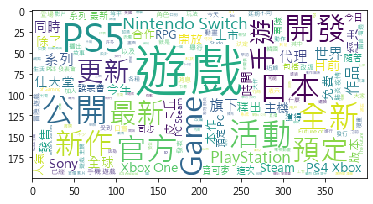

In [6]:
wcloud = WordCloud(background_color='white',font_path = 'msjh.ttf').generate(' '.join(word_list))
print(wcloud)
plt.imshow(wcloud)